<a href="https://colab.research.google.com/github/chelseaangeles/programming-assignment-3/blob/main/Programming_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Programming Assignment 3: Logistic Regression**

> Group Members:
1. Angeles, Chelsea R.
2. Reyes, Rychard Andrei C.
3. Soriano, Adelyn Joyce S.

# ***General Guidelines***

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    roc_curve,
    roc_auc_score
)
import matplotlib.pyplot as plt

# Step 1: Load and preprocess the dataset
# Correct dataset URL for Wisconsin Breast Cancer dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"


In [ ]:
# Define column names based on the dataset documentation
column_names = [
    "Sample code number", "Clump Thickness", "Uniformity of Cell Size",
    "Uniformity of Cell Shape", "Marginal Adhesion", "Single Epithelial Cell Size",
    "Bare Nuclei", "Bland Chromatin", "Normal Nucleoli", "Mitoses", "Class"
]

# Load the dataset
df = pd.read_csv(url, header=None, names=column_names)

df

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [ ]:
# Replace missing values ("?") with NaN and convert columns to numeric
df.replace("NaN", np.nan, inplace=True)
df["Bare Nuclei"] = pd.to_numeric(df["Bare Nuclei"], errors="coerce")

# Drop rows with missing values
df.dropna(inplace=True)

# Convert "Class" values: 2 → 0 (benign), 4 → 1 (malignant)
df["Class"] = df["Class"].replace({2: 0, 4: 1})

# Drop the "Sample code number" column (not needed for classification)
df.drop(columns=["Sample code number"], inplace=True)

df

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1.0,3,1,1,0
1,5,4,4,5,7,10.0,3,2,1,0
2,3,1,1,1,2,2.0,3,1,1,0
3,6,8,8,1,3,4.0,3,7,1,0
4,4,1,1,3,2,1.0,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2.0,1,1,1,0
695,2,1,1,1,2,1.0,1,1,1,0
696,5,10,10,3,7,3.0,8,10,2,1
697,4,8,6,4,3,4.0,10,6,1,1


## **Split the Samples into 70% Training and 30% Testing at Random Using `stratify = y` in the train_test_split**

In [ ]:
# Split the dataset into features (X) and target (y)
x = df.drop(columns=["Class"])  # Features
y = df["Class"]  # Target

# Split the data into training (70%) and testing (30%) sets, using stratification
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=42, stratify=y
)

# Build a pipeline with StandardScaler and Logistic Regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('logistic', LogisticRegression())  # Logistic Regression model
])

# Train the pipeline on the training data
pipeline.fit(x_train, y_train)

# Evaluate the model's training and testing accuracy
train_accuracy = pipeline.score(x_train, y_train)
test_accuracy = pipeline.score(x_test, y_test)

# Display results
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")

Training Accuracy: 0.98
Testing Accuracy: 0.96


## **Use the Default Penalty Settings of Logistic Regression**

In [ ]:
# Build a pipeline with StandardScaler and LogisticRegression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logistic', LogisticRegression())
])

# Fit the pipeline to the training data
pipeline.fit(x_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic', LogisticRegression())])

## **Training and Testing Accuracy**

In [ ]:
# Training and testing accuracy
train_accuracy = pipeline.score(x_train, y_train)
test_accuracy = pipeline.score(x_test, y_test)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

# Access the Logistic Regression estimator within the pipeline using named_steps
logistic_model = pipeline.named_steps['logistic']

# Identify the most influential features
feature_importance = pd.DataFrame({
    "Feature": x.columns,
    "Coefficient": logistic_model.coef_[0]  # Access coef_ from the estimator
}).sort_values(by="Coefficient", key=abs, ascending=False)
print("\nMost Influential Features:\n", feature_importance)

Training Accuracy: 0.9770
Testing Accuracy: 0.9610

Most Influential Features:
                        Feature  Coefficient
5                  Bare Nuclei     1.849199
0              Clump Thickness     1.198459
8                      Mitoses     0.889682
2     Uniformity of Cell Shape     0.877177
1      Uniformity of Cell Size     0.736751
3            Marginal Adhesion     0.676237
7              Normal Nucleoli     0.494755
6              Bland Chromatin     0.440015
4  Single Epithelial Cell Size     0.382828


## **Confusion Matrix**


Confusion Matrix:
 [[128   5]
 [  3  69]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97       133
           1       0.93      0.96      0.95        72

    accuracy                           0.96       205
   macro avg       0.95      0.96      0.96       205
weighted avg       0.96      0.96      0.96       205



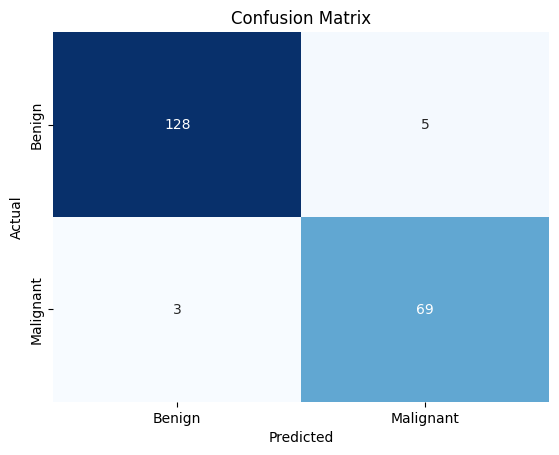

In [ ]:
# Assuming y_test and y_pred are already defined
# You need to predict on the test set to get y_pred
y_pred = pipeline.predict(x_test)  # Predict using the trained pipeline

cm = confusion_matrix(y_test, y_pred)

# Print the numerical confusion matrix
print("\nConfusion Matrix:\n", cm)

# Print the classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'], cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## **Plot ROC Curve and Report the AUC**


Training AUC: 0.9978
Testing AUC: 0.9918


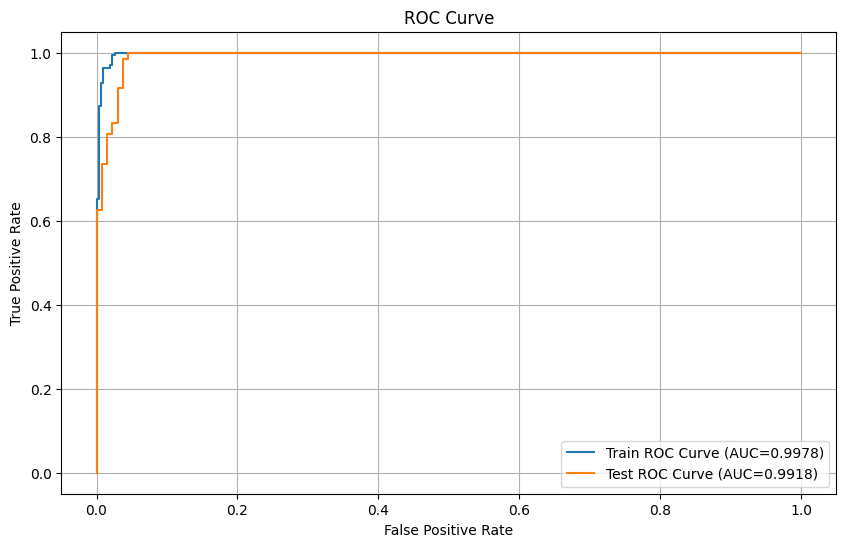

In [ ]:
# ROC Curve and AUC
y_train_proba = pipeline.predict_proba(x_train)[:, 1]
y_test_proba = pipeline.predict_proba(x_test)[:, 1]

train_auc = roc_auc_score(y_train, y_train_proba)
test_auc = roc_auc_score(y_test, y_test_proba)

print(f"\nTraining AUC: {train_auc:.4f}")
print(f"Testing AUC: {test_auc:.4f}")

fpr_train, tpr_train, _ = roc_curve(y_train, y_train_proba)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_proba)

# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr_train, tpr_train, label=f"Train ROC Curve (AUC={train_auc:.4f})")
plt.plot(fpr_test, tpr_test, label=f"Test ROC Curve (AUC={test_auc:.4f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()

# ***Guide Questions***

**1. What steps are required to remove the "Sample code number" column?**

*   *The sample code number column is an identifier and does not contribute to classification. Hence, to remove the "Sample code number" column, use the drop function in pandas: `df.drop(columns=["Sample code number"], inplace=True)` This command permanently removes the column from the DataFrame.*


**2. How can the "Class" values be converted into binary (0 and 1) form in Python?**

*   *The "Class" column can be converted using the replace function: `df["Class"] = df["Class"].replace({2: 0, 4: 1})`. This conversion maps the 'Class' values where 2 represents benign (0) and 4 represents malignant (1), which is essential for binary classification tasks.*

**3. What is the importance of splitting the dataset into training and testing sets?**

*   *Splitting the dataset into training and testing sets helps the model learn from one part of the data and be tested on another. This prevents overfitting and ensures that the model performs well on new data.*
  *   *Training set is used to train the model and adjust its parameters.*
  *   *Testing set is used to evaluate how well the model generalizes to new data.*
*   *A 70/30 split is standard to provide enough data for training while reserving sufficient data for testing.*

**4. Why is it necessary to use the stratify parameter in the train_test_split function?**

*   *The stratify parameter ensures the class distribution (benign vs. malignant) remains the same in both training and testing sets to avoid imbalanced splits, which could bias the model.*

**5. What is logistic regression, and why is it suitable for this dataset?**

*   *Logistic regression is a method for binary classification. It predicts the probability of an outcome (such as benign or malignant) and maps it to 0 or 1. It is suitable for this dataset because it deals with binary classes and works well with standardized numerical features.*

**6. How can the training and testing accuracy of the logistic regression model be calculated?**

*   *The `.score()` method calculates accuracy as the ratio of correctly predicted instances to the total instances*

**7. Which features in the dataset are most influential in determining the tumor status, and how can their importance be assessed?**


  *   *Feature importance can be assessed using the coefficients of the logistic regression model.*
  *   *The features with the highest absolute coefficients have the most influence on tumor classification. For example, `Clump Thickness` and `Bare Nuclei` are often the most influential.*

**8. How is a confusion matrix generated, and what does it represent?**

*   *The confusion matrix is generated using: `cm = confusion_matrix(y_test, y_pred)`*
*   *It represents the counts of:*
  *   *True positives where the malignant tumors are detected correctly*
  *   *True negatives where benign tumors are detected correctly*
  *   *False positives where malignant tumors detected are as benign*
  *   *False negatives where benign tumors are detected as malignant*

**9. How are precision, recall, F1-score, and false alarm rate calculated from the confusion matrix?**

*   *These metrics can be calculated using `classification_report`*

**10. Why are these metrics important for evaluating the performance of a classifier?**

*   *Precision indicates the reliability of positive predictions.*
*   *Recall is used to measure the ability to detect true positives (important in medical diagnosis).*
*   *F1-scores balances precision and recall, useful for imbalanced datasets.*
*   *False Alarm Rate measures how often benign cases are incorrectly classified, it is critical in avoiding unnecessary treatments.*

**11. What is an ROC curve, and how is it plotted for a logistic regression model?**

*   *An ROC curve is a graphical representation of a classifier's performance. It plots the True Positive Rate against the False Positive Rate. A perfect classifier would have an ROC curve that passes through the top-left corner, indicating 100% sensitivity and specificity.*


*   *For a logistic regression model, use the `predict_proba` method to obtain the probability predictions for the positive class. Using `roc_curve` from `sklearn.metrics` to compute the False Positive Rate and True Positive Rate at different thresholds. Then, plot the FPR against the TPR using `matplotlib`.*




**12. How is the AUC (Area Under the Curve) calculated, and what does it signify about the model's performance?**

*   *The AUC can be calculated using the `roc_auc_score` function from `sklearn.metrics`, passing the true labels and predicted probabilities as inputs. A higher AUC indicates better model performance.*

**13. How do the training and testing ROC curves compare, and what insights can be derived from this comparison?**

*   *The training ROC curve demonstrates a high True Positive Rate across various thresholds, with an AUC value close to 1. This indicates that the model performs well on the training data, correctly classifying most samples. The testing ROC curve is slightly below the training curve but still shows a good TPR with a high AUC value. This suggests that the model generalizes well and performs reliably on unseen data. The similarity between the training and testing ROC curves indicates that the model is neither overfitting nor underfitting. Any minor differences between the two curves are expected and acceptable due to variability in the data split.*

**14. What challenges did you encounter during the preprocessing or model training phases, and how did you address them?**

*   *Rows with missing values in the dataset were identified and removed by replacing them with NaN.*
*   *The 'Class' column contained categorical values so we converted the values: 2 → 0 (benign), 4 → 1 (malignant).*
*  *The dataset contains features with varying scales so standardization using `StandardScaler` was applied to ensure features were on the same scale.*
*   *There is a class imbalance so we used stratified splitting in `train_test_split` to maintain the class distribution in training and testing sets.*

**15. If the model's performance is not satisfactory, what adjustments could be made to improve it?**

*   *Decide which features are most relevant and informative for the model, then discard the redundant or noisy ones.*
*   *Experiment with different regularization strengths or solvers, finding the optimal values for the parameters that control the behavior and complexity of the model.*
*   *Transform and clean the data in order to make it suitable and compatible for the model. This can involve handling missing values, outliers, categorical variables, and scaling.*